# My First Full analysis
## by Miles Johnson
#### I have always been a fan of video games and ever since I came across the competitive seen, I have been hooked. I aspire to be a data analyst and just started learning. 

#### This is my first time using code to do a full analysis. I have taken a ton of courses and decided to put my skills to the test. 

#### I wanted to practice **pandas** and visualization using **seaborn**. Doing this project I learned many different ways to manipulate and pull the data I need from the dataset. Also how to plot different graphs using specific values from specific columns. 

## I would love any feedback on how I could better my analysis!

# Import libraries and read in data


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input/esports-earnings/GeneralEsportData.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
gen_data = pd.read_csv('/kaggle/input/esports-earnings/GeneralEsportData.csv')
hist_data = pd.read_csv('/kaggle/input/esports-earnings/HistoricalEsportData.csv')

In [3]:
gen_data.head()

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,493845.74,363105.40,0.735261,453,250
1,Age of Empires II,1999,Strategy,3220622.76,1131355.02,0.351285,1968,1583
2,Age of Empires III,2005,Strategy,115418.65,41800.00,0.362160,165,155
3,Age of Empires IV,2021,Strategy,977755.71,409117.93,0.418426,539,319
4,Age of Empires Online,2011,Strategy,9706.56,775.00,0.079843,44,49


In [4]:
hist_data.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-05-01,QuakeWorld,300.0,3,1
3,1998-07-01,Quake II,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2


In [5]:
hist_data.dtypes

Date            object
Game            object
Earnings       float64
Players          int64
Tournaments      int64
dtype: object

In [6]:
hist_data['Date'] = pd.to_datetime(hist_data['Date'])
hist_data.dtypes

Date           datetime64[ns]
Game                   object
Earnings              float64
Players                 int64
Tournaments             int64
dtype: object

# Data Understanding

In [7]:
gen_data.shape

(647, 8)

In [8]:
gen_data.dtypes

Game                 object
ReleaseDate           int64
Genre                object
TotalEarnings       float64
OfflineEarnings     float64
PercentOffline      float64
TotalPlayers          int64
TotalTournaments      int64
dtype: object

In [9]:
gen_data.isna().sum()

Game                 0
ReleaseDate          0
Genre                0
TotalEarnings        0
OfflineEarnings      0
PercentOffline      66
TotalPlayers         0
TotalTournaments     0
dtype: int64

In [10]:
hist_data.isna().sum()

Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
dtype: int64

In [11]:
gen_data.columns

Index(['Game', 'ReleaseDate', 'Genre', 'TotalEarnings', 'OfflineEarnings',
       'PercentOffline', 'TotalPlayers', 'TotalTournaments'],
      dtype='object')

In [12]:
pd.set_option('float_format', '{:f}'.format)
gen_data.describe()

,ReleaseDate,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
count,647.000000,647.000000,647.000000,581.000000,647.000000,647.000000
mean,2012.525502,2501950.420325,1758193.440881,0.656465,224.132921,92.941267
std,7.425932,17464038.065237,13728656.133172,0.414826,952.839342,473.238065
min,1981.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,1000.000000,0.000000,0.121071,4.000000,1.000000
50%,2015.000000,36000.000000,13463.280000,0.906896,21.000000,5.000000
75%,2018.000000,259919.425000,170100.000000,1.000000,98.000000,27.000000
max,2023.000000,335522228.020000,297870148.560000,1.000000,16069.000000,7190.000000


In [13]:
hist_data.describe()

,Earnings,Players,Tournaments
count,8891.000000,8891.000000,8891.000000
mean,175135.664232,59.057361,6.601057
std,1016232.325237,128.634142,11.995499
min,0.000000,0.000000,1.000000
25%,1035.000000,6.000000,1.000000
50%,10000.000000,16.000000,2.000000
75%,68965.605000,50.000000,6.000000
max,40138651.260000,1719.000000,172.000000


# Data Preparation

In [14]:
gen_data

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,493845.740000,363105.400000,0.735261,453,250
1,Age of Empires II,1999,Strategy,3220622.760000,1131355.020000,0.351285,1968,1583
2,Age of Empires III,2005,Strategy,115418.650000,41800.000000,0.362160,165,155
3,Age of Empires IV,2021,Strategy,977755.710000,409117.930000,0.418426,539,319
4,Age of Empires Online,2011,Strategy,9706.560000,775.000000,0.079843,44,49
...,...,...,...,...,...,...,...,...
642,Guitar Hero 5,2009,Music / Rhythm Game,10500.000000,10500.000000,1.000000,3,1
643,Guitar Hero III: Legends of Rock,2007,Music / Rhythm Game,19000.000000,19000.000000,1.000000,8,2
644,Guitar Hero: World Tour,2008,Music / Rhythm Game,0.000000,0.000000,NaN,0,0
645,Just Dance 2014,2013,Music / Rhythm Game,0.000000,0.000000,NaN,3,1


In [15]:
gen_data.TotalEarnings = gen_data.TotalEarnings/1000000
gen_data.OfflineEarnings = gen_data.OfflineEarnings/1000000

In [16]:
hist_data

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.000000,8,1
1,1998-05-01,Quake II,14600.000000,4,1
2,1998-05-01,QuakeWorld,300.000000,3,1
3,1998-07-01,Quake II,6500.000000,4,1
4,1998-11-01,Quake II,36600.000000,13,2
...,...,...,...,...,...
8886,2023-06-01,Temtem,2000.000000,4,1
8887,2023-06-01,Tekken 7,655.270000,6,1
8888,2023-06-01,Age of Mythology,550.000000,5,2
8889,2023-06-01,Age of Empires III,350.000000,2,1


In [17]:
#merging tables so i can have genre in history data
hist_data = pd.merge(hist_data, gen_data, how='left', on=['Game'])


In [18]:
hist_data = hist_data.drop(columns=['ReleaseDate','TotalEarnings', 'OfflineEarnings', 'TotalPlayers',
       'TotalTournaments'], axis=1)
hist_data

,Date,Game,Earnings,Players,Tournaments,Genre,PercentOffline
0,1998-01-01,QuakeWorld,15000.000000,8,1,First-Person Shooter,0.944507
1,1998-05-01,Quake II,14600.000000,4,1,First-Person Shooter,0.995212
2,1998-05-01,QuakeWorld,300.000000,3,1,First-Person Shooter,0.944507
3,1998-07-01,Quake II,6500.000000,4,1,First-Person Shooter,0.995212
4,1998-11-01,Quake II,36600.000000,13,2,First-Person Shooter,0.995212
...,...,...,...,...,...,...,...
8888,2023-06-01,Temtem,2000.000000,4,1,Strategy,0.000000
8889,2023-06-01,Tekken 7,655.270000,6,1,Fighting Game,0.927964
8890,2023-06-01,Age of Mythology,550.000000,5,2,Strategy,0.473160
8891,2023-06-01,Age of Empires III,350.000000,2,1,Strategy,0.362160


In [19]:
hist_data.columns

Index(['Date', 'Game', 'Earnings', 'Players', 'Tournaments', 'Genre',
       'PercentOffline'],
      dtype='object')

In [20]:
hist_data = hist_data[hist_data['Earnings'] > 0]
hist_data

,Date,Game,Earnings,Players,Tournaments,Genre,PercentOffline
0,1998-01-01,QuakeWorld,15000.000000,8,1,First-Person Shooter,0.944507
1,1998-05-01,Quake II,14600.000000,4,1,First-Person Shooter,0.995212
2,1998-05-01,QuakeWorld,300.000000,3,1,First-Person Shooter,0.944507
3,1998-07-01,Quake II,6500.000000,4,1,First-Person Shooter,0.995212
4,1998-11-01,Quake II,36600.000000,13,2,First-Person Shooter,0.995212
...,...,...,...,...,...,...,...
8888,2023-06-01,Temtem,2000.000000,4,1,Strategy,0.000000
8889,2023-06-01,Tekken 7,655.270000,6,1,Fighting Game,0.927964
8890,2023-06-01,Age of Mythology,550.000000,5,2,Strategy,0.473160
8891,2023-06-01,Age of Empires III,350.000000,2,1,Strategy,0.362160


In [21]:
gen_clean = gen_data[(gen_data['TotalEarnings'] > 0) & (gen_data['OfflineEarnings'] > 0)]
gen_clean


,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,0.493846,0.363105,0.735261,453,250
1,Age of Empires II,1999,Strategy,3.220623,1.131355,0.351285,1968,1583
2,Age of Empires III,2005,Strategy,0.115419,0.041800,0.362160,165,155
3,Age of Empires IV,2021,Strategy,0.977756,0.409118,0.418426,539,319
4,Age of Empires Online,2011,Strategy,0.009707,0.000775,0.079843,44,49
...,...,...,...,...,...,...,...,...
635,Gears of War: Ultimate Edition,2015,Third-Person Shooter,0.170000,0.170000,1.000000,39,3
637,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,0.000420,0.000320,0.761905,12,2
642,Guitar Hero 5,2009,Music / Rhythm Game,0.010500,0.010500,1.000000,3,1
643,Guitar Hero III: Legends of Rock,2007,Music / Rhythm Game,0.019000,0.019000,1.000000,8,2


### I dropped all rows where total earnings and Offline earnings were 0 to keep out unnecessary rows

# Data Visualization

In [22]:
sns.set_palette('bright')

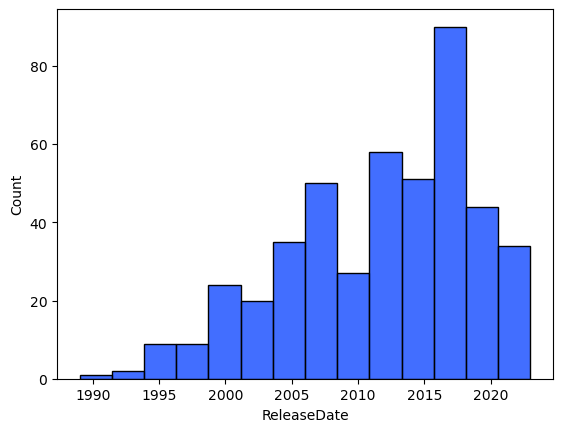

In [23]:
sns.histplot(data=gen_clean, x='ReleaseDate')
plt.show()

### We see here that most games in our data released 2010-2023.

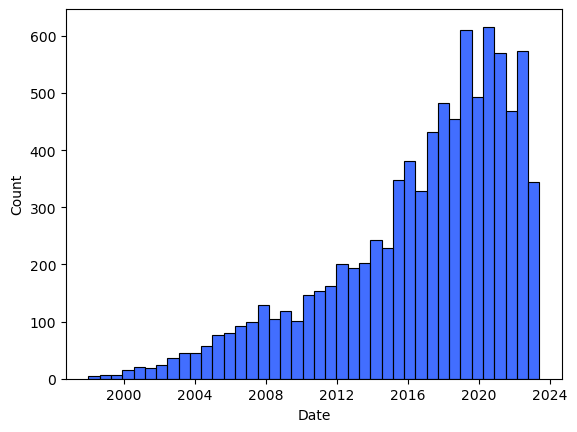

In [24]:
sns.histplot(data=hist_data, x='Date')
plt.show()

## The number of tournaments have been trending since esports first started. 

In [25]:
gen_clean.Genre.replace({'Multiplayer Online Battle Arena':'MOBA',
                        'First-Person Shooter': 'FPS',
                         'Role-Playing Game': 'RPG',
                         'Third-Person Shooter': 'TPS',
                        'Collectible Card Game': 'Card Game'}, inplace=True)
gen_clean.Game.replace({"PLAYERUNKNOWN'S BATTLEGROUNDS Mobile": 'PUBG MOBILE',
                       'PLAYERUNKNOWN’S BATTLEGROUNDS': 'PUBG',
                       'Counter-Strike: Global Offensive': 'CS-GO',
                       'Super Smash Bros. Ultimate': 'Smash Ultimate',
                       'Super Smash Bros. Melee': 'Smash Melee'}, inplace=True)
hist_data.Game.replace({"PLAYERUNKNOWN'S BATTLEGROUNDS Mobile": 'PUBG MOBILE',
                       'PLAYERUNKNOWN’S BATTLEGROUNDS': 'PUBG',
                       'Counter-Strike: Global Offensive': 'CS-GO',
                       'Super Smash Bros. Ultimate': 'Smash Ultimate',
                       'Super Smash Bros. Melee': 'Smash Melee'}, inplace=True)
hist_data.Genre.replace({'Multiplayer Online Battle Arena':'MOBA',
                        'First-Person Shooter': 'FPS',
                         'Role-Playing Game': 'RPG',
                         'Third-Person Shooter': 'TPS',
                        'Collectible Card Game': 'Card Game'}, inplace=True)
                         

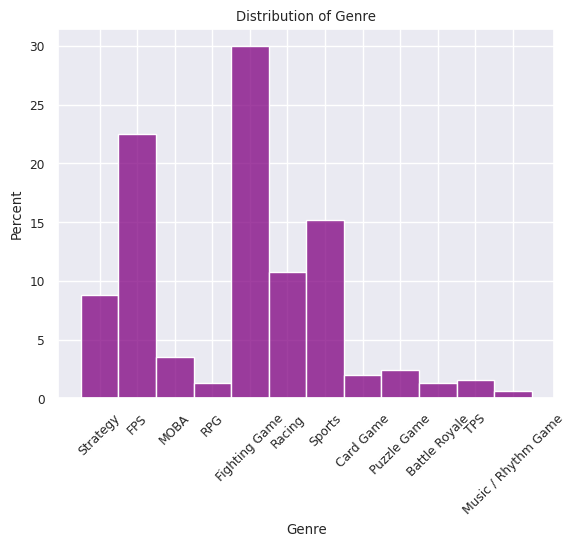

In [26]:
sns.set(font_scale=.8)
sns.histplot(data=gen_clean, x = gen_clean['Genre'], stat='percent', color='purple')
plt.xticks(rotation = 45)
plt.title('Distribution of Genre')
plt.show()

### Most of our games are first person shooter(20%) and fighting(30%) genre

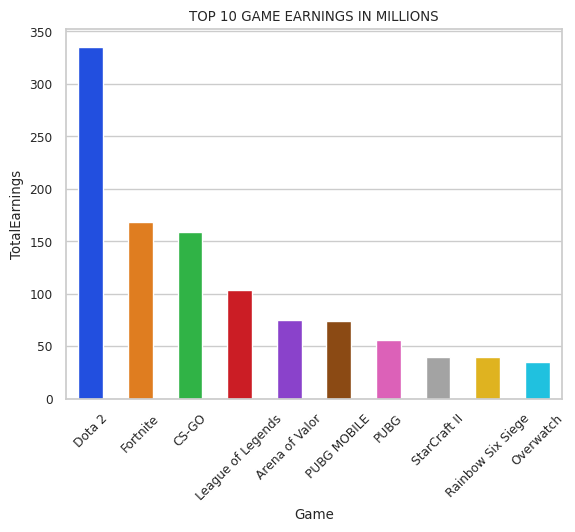

In [27]:
sns.set_palette('bright')
sns.set_style('whitegrid')
# top ten games by total earnings
earnings = gen_clean.sort_values('TotalEarnings', ascending=False).iloc[:10]
sns.barplot(data=earnings, x='Game', y='TotalEarnings', width=.5)
plt.xticks(rotation = 45)
plt.title('TOP 10 GAME EARNINGS IN MILLIONS')
plt.show()

## **Dota 2** hold top spot in total earnings.

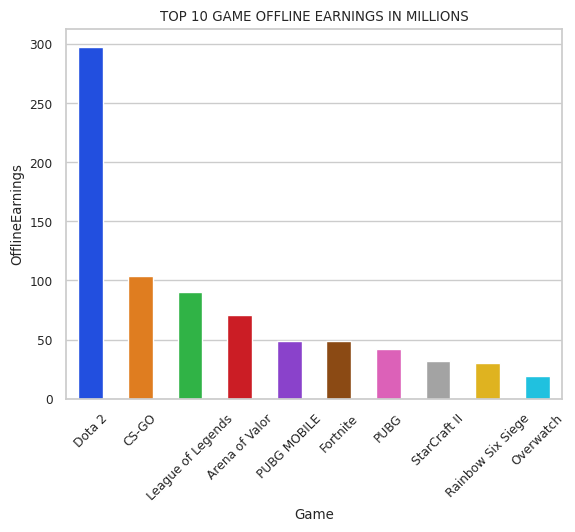

In [28]:
#Top 10 games by offline earnings
off_earn = gen_clean.sort_values('OfflineEarnings', ascending=False).iloc[:10]
sns.barplot(data=off_earn, x='Game', y='OfflineEarnings', width=.5)
plt.xticks(rotation = 45)
plt.title('TOP 10 GAME OFFLINE EARNINGS IN MILLIONS')
plt.show()

## **Dota 2** also hold number 1 in most earngings by offline tournaments

In [29]:
# making 'online earnings' column
gen_clean['OnlineEarnings'] = gen_clean['TotalEarnings'] - gen_clean['OfflineEarnings']
gen_clean

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments,OnlineEarnings
0,Age of Empires,1997,Strategy,0.493846,0.363105,0.735261,453,250,0.130740
1,Age of Empires II,1999,Strategy,3.220623,1.131355,0.351285,1968,1583,2.089268
2,Age of Empires III,2005,Strategy,0.115419,0.041800,0.362160,165,155,0.073619
3,Age of Empires IV,2021,Strategy,0.977756,0.409118,0.418426,539,319,0.568638
4,Age of Empires Online,2011,Strategy,0.009707,0.000775,0.079843,44,49,0.008932
...,...,...,...,...,...,...,...,...,...
635,Gears of War: Ultimate Edition,2015,TPS,0.170000,0.170000,1.000000,39,3,0.000000
637,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,TPS,0.000420,0.000320,0.761905,12,2,0.000100
642,Guitar Hero 5,2009,Music / Rhythm Game,0.010500,0.010500,1.000000,3,1,0.000000
643,Guitar Hero III: Legends of Rock,2007,Music / Rhythm Game,0.019000,0.019000,1.000000,8,2,0.000000


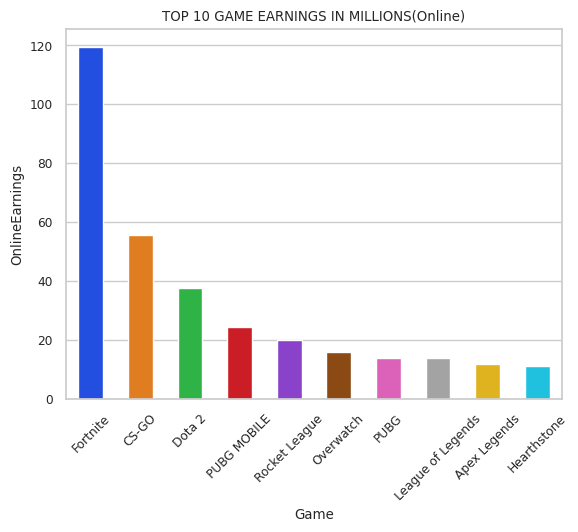

In [30]:
# Top 10 games by online earnings
earnings_on = gen_clean.sort_values('OnlineEarnings', ascending=False).iloc[:10]
sns.barplot(data=earnings_on, x='Game', y='OnlineEarnings', width=.5)
plt.xticks(rotation = 45)
plt.title('TOP 10 GAME EARNINGS IN MILLIONS(Online)')
plt.show()

### **Fortnite** has the highest earnings in Online only tournaments by a long run. 

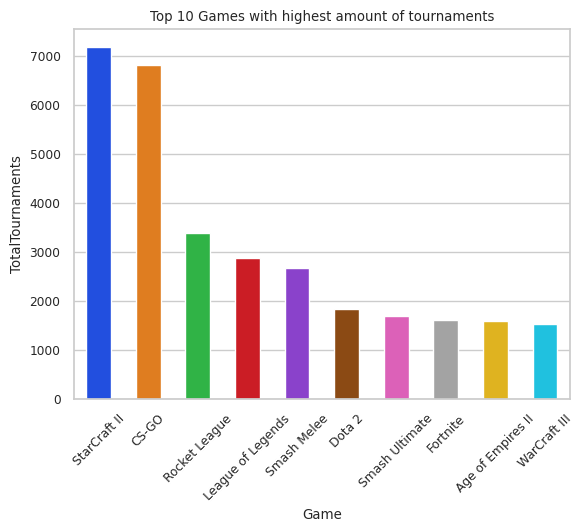

In [31]:
#top 10 games by number of tournaments
highest_tour = gen_clean.sort_values('TotalTournaments', ascending=False).iloc[:10]
sns.barplot(data=highest_tour, x='Game', y= 'TotalTournaments', width=.5)
plt.xticks(rotation=45)
plt.title('Top 10 Games with highest amount of tournaments')
plt.show()

### **Starcraft** has the highest amount of tournaments played. **Rocket league** didnt make top 10 earnings yet they are number 3 here.

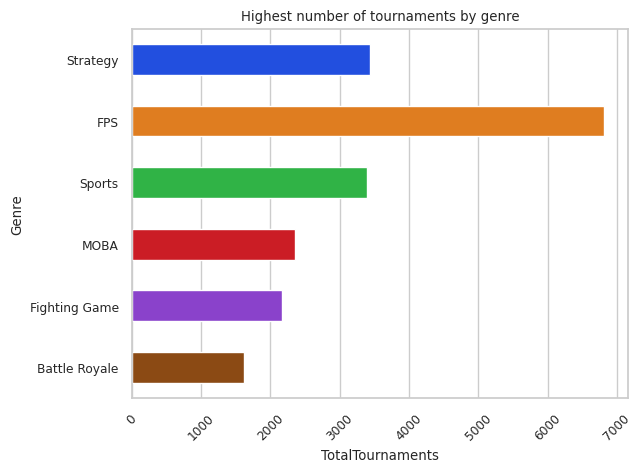

In [32]:
sns.barplot(data=highest_tour, x='TotalTournaments', y='Genre', width=.5, errorbar=None, orient='h')
plt.xticks(rotation=45)
plt.title('Highest number of tournaments by genre')
plt.show()

## If we look at tournamnets by genre, we see that **FPS** games hold the most tournaments than any other genre. 

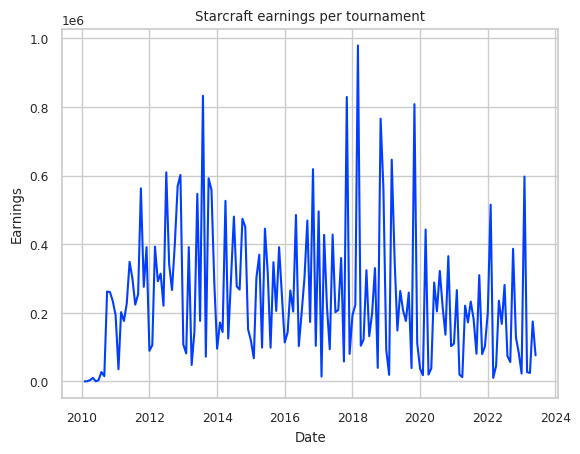

In [33]:
Starcraft_II = hist_data.loc[hist_data['Game'] == 'StarCraft II']
sns.lineplot(data=Starcraft_II, x='Date', y='Earnings')
plt.title('Starcraft earnings per tournament')
plt.show()

## Starcraft II holds a wide range of tournaments with a wide range of earnings per tournament. There highest peak was in 2018 and has been trending down since. 

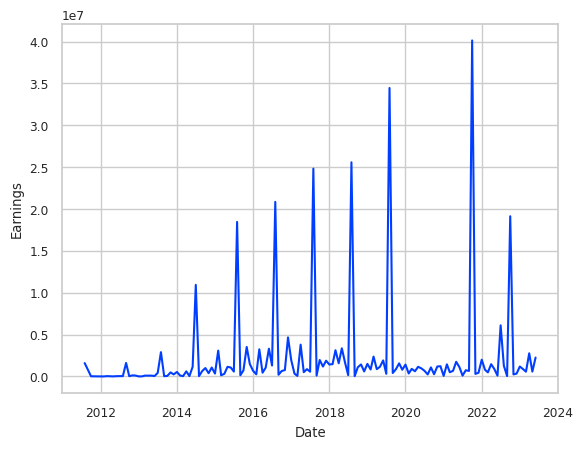

In [34]:
Dota_2 = hist_data.loc[hist_data['Game'] == 'Dota 2']
sns.lineplot(data=Dota_2, x='Date', y='Earnings')
plt.show()

## Here we Dota 2 holds 2 major tournaments a year. In the beginning of 2020 we see a gap because of COVID. 

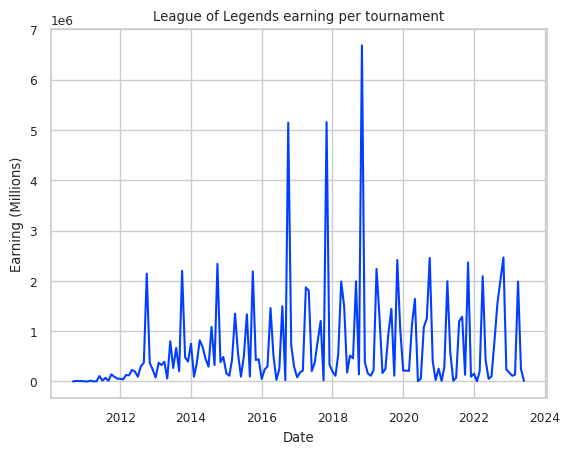

In [35]:
League = hist_data.loc[hist_data['Game'] == 'League of Legends']
sns.lineplot(data=League, x='Date', y='Earnings')
plt.title('League of Legends earning per tournament')
plt.ylabel('Earning (Millions)')
plt.show()

## League of legends Earning peaked between 2018 and 2019. Most of there earnings fall bewtween 1 and 2 million.

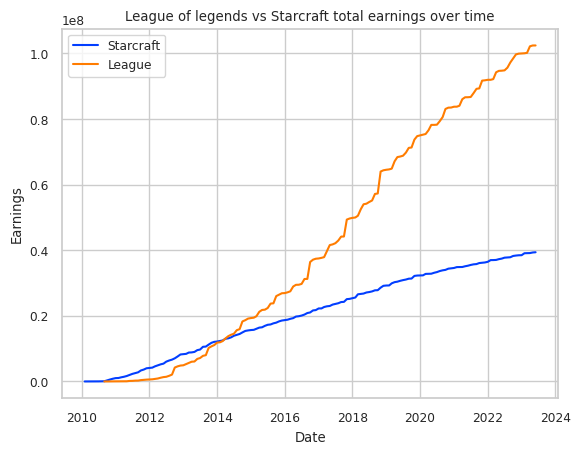

In [36]:
sns.lineplot(y=Starcraft_II['Earnings'].cumsum(), x='Date', data=Starcraft_II, label='Starcraft')
sns.lineplot(y=League['Earnings'].cumsum(), x='Date', data=League, label='League')
plt.legend()
plt.title('League of legends vs Starcraft total earnings over time')
plt.show()

## This chart show Starcraft earnings over time against league of legends. 

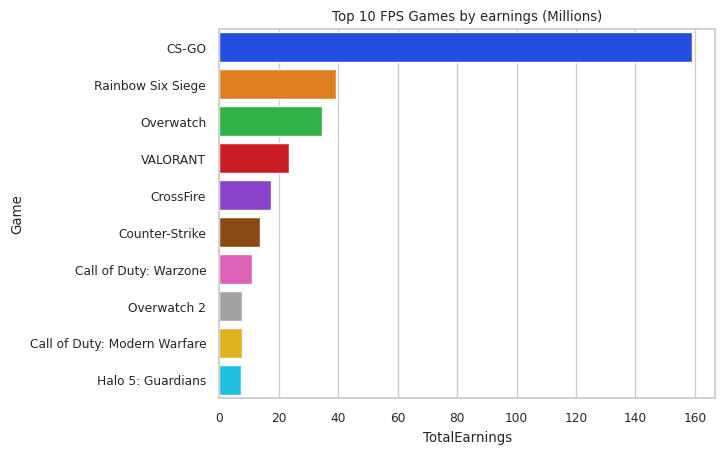

In [37]:
FPS_game = gen_clean.loc[gen_clean['Genre'] == 'FPS'].sort_values('TotalEarnings', ascending=False).iloc[:10]
sns.barplot(x='TotalEarnings', y='Game', data=FPS_game, orient='h')
plt.title('Top 10 FPS Games by earnings (Millions)')
plt.show()

## CS-GO has the highest earnings than any other FPS game. CS-GO has 120 million more earnings than the second spot.

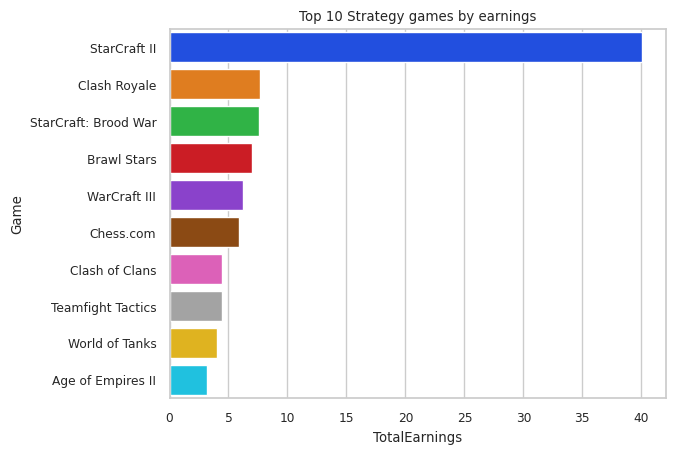

In [38]:
strat_game = gen_clean.loc[gen_clean['Genre']=='Strategy'].sort_values('TotalEarnings', ascending=False).iloc[:10]
sns.barplot(data=strat_game, x='TotalEarnings', y='Game', orient='h')
plt.title('Top 10 Strategy games by earnings')
plt.show()

## Starcraft II is the leading game by earnings in the strategy genre